# Guided Capstone Project

## Data contains information from 330 resorts in the US
### Column description of the data
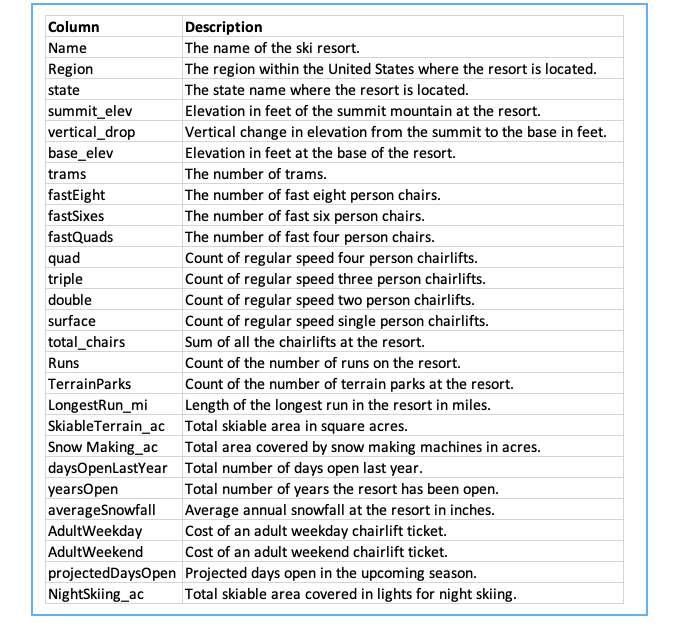

### Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading data

In [102]:
data = pd.read_csv(r"C:\Users\spider\Documents\Springboard\course\6 Appying data science\6.2 Data wrangling\1589505302_05152020_updated_ski_data_-_updated_ski_data.csv")

### Exploring data

In [103]:
data.head(8)

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0
5,Yosemite Ski & Snowboard Area,Northern California,California,7800,600,7200,0,0.0,0,0,...,0.4,88.0,NaN,110.0,84.0,300.0,47.0,47.0,107.0,NaN
6,Bear Mountain,Sierra Nevada,California,8805,1665,7140,0,0.0,0,2,...,1.5,198.0,198.0,122.0,76.0,100.0,NaN,NaN,130.0,NaN
7,Bear Valley,Sierra Nevada,California,8500,1900,6600,0,0.0,1,1,...,1.2,1680.0,100.0,165.0,52.0,359.0,NaN,NaN,151.0,NaN


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            164 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 326 non-null float64
TerrainParks         279 non-null float64
LongestRun_mi        325 non-null float64
SkiableTerrain_ac    327 non-null float64
Snow Making_ac       284 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null floa

### Cleaning data

In [106]:
is_duplicate = data['Region'] == data['state']
is_duplicate.describe()

count      330
unique       2
top       True
freq       297
dtype: object

In [107]:
data['fastEight'].unique()

array([ 0., nan,  1.])

In [108]:
data['fastEight'].fillna(0, inplace = True)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 326 non-null float64
TerrainParks         279 non-null float64
LongestRun_mi        325 non-null float64
SkiableTerrain_ac    327 non-null float64
Snow Making_ac       284 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null floa

In [110]:
data['Runs'].describe()

count    326.000000
mean      48.214724
std       46.364077
min        3.000000
25%       19.000000
50%       33.000000
75%       60.000000
max      341.000000
Name: Runs, dtype: float64

In [111]:
data[data['Runs'].isnull()]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
39,Silverton Mountain,Colorado,Colorado,13487,3087,10400,0,0.0,0,0,...,1.5,26819.0,NaN,175.0,17.0,400.0,79.0,79.0,181.0,NaN
108,Mount Bohemia,Michigan,Michigan,1500,900,600,0,0.0,0,0,...,2.3,585.0,NaN,83.0,19.0,273.0,68.0,68.0,100.0,NaN
218,Sapphire Valley,North Carolina,North Carolina,3450,200,3200,0,0.0,0,0,...,1.0,8.0,8.0,53.0,55.0,24.0,40.0,43.0,60.0,8.0
296,Mission Ridge,Washington,Washington,6820,2250,4570,0,0.0,0,1,...,0.8,2000.0,66.0,104.0,53.0,200.0,NaN,NaN,96.0,500.0


In [112]:
data['Runs'].fillna(48, inplace = True)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         279 non-null float64
LongestRun_mi        325 non-null float64
SkiableTerrain_ac    327 non-null float64
Snow Making_ac       284 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null floa

In [114]:
data['TerrainParks'].describe()

count    279.000000
mean       2.820789
std        2.008113
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       14.000000
Name: TerrainParks, dtype: float64

In [115]:
data['TerrainParks'].fillna(2, inplace = True)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        325 non-null float64
SkiableTerrain_ac    327 non-null float64
Snow Making_ac       284 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null floa

In [117]:
data['LongestRun_mi'].describe()

count    325.000000
mean       1.433231
std        1.156171
min        0.000000
25%        0.500000
50%        1.000000
75%        2.000000
max        6.000000
Name: LongestRun_mi, dtype: float64

In [118]:
data['LongestRun_mi'].head(10)

0    1.0
1    2.0
2    1.0
3    2.0
4    1.2
5    0.4
6    1.5
7    1.2
8    1.0
9    2.0
Name: LongestRun_mi, dtype: float64

In [119]:
data['LongestRun_mi'].fillna(data['LongestRun_mi'].mean, inplace = True)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null object
SkiableTerrain_ac    327 non-null float64
Snow Making_ac       284 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null float

In [121]:
data['SkiableTerrain_ac'].describe()

count      327.000000
mean       739.801223
std       1816.167441
min          8.000000
25%         85.000000
50%        200.000000
75%        690.000000
max      26819.000000
Name: SkiableTerrain_ac, dtype: float64

In [122]:
data['SkiableTerrain_ac'].fillna(739, inplace = True)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null object
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       284 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null float

In [124]:
data['Snow Making_ac'].describe()

count     284.000000
mean      174.873239
std       261.336125
min         2.000000
25%        50.000000
50%       100.000000
75%       200.500000
max      3379.000000
Name: Snow Making_ac, dtype: float64

In [125]:
data['Snow Making_ac'].fillna(175, inplace = True)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null object
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null float

In [127]:
data['daysOpenLastYear'].describe()

count    279.000000
mean     115.103943
std       35.063251
min        3.000000
25%       97.000000
50%      114.000000
75%      135.000000
max      305.000000
Name: daysOpenLastYear, dtype: float64

In [128]:
data['daysOpenLastYear'].fillna(115, inplace = True)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null object
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            329 non-null float

In [130]:
data['yearsOpen'].describe()

count     329.000000
mean       63.656535
std       109.429928
min         6.000000
25%        50.000000
50%        58.000000
75%        69.000000
max      2019.000000
Name: yearsOpen, dtype: float64

In [131]:
data['yearsOpen'].fillna(64, inplace = True)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null object
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            330 non-null float

In [133]:
data['averageSnowfall'].describe()

count    316.000000
mean     185.316456
std      136.356842
min       18.000000
25%       69.000000
50%      150.000000
75%      300.000000
max      669.000000
Name: averageSnowfall, dtype: float64

In [134]:
data['averageSnowfall'].fillna(int(data['averageSnowfall'].mean()), inplace = True)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null object
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            330 non-null float

In [136]:
data['AdultWeekday'].describe()

count    276.000000
mean      57.916957
std       26.140126
min       15.000000
25%       40.000000
50%       50.000000
75%       71.000000
max      179.000000
Name: AdultWeekday, dtype: float64

In [137]:
data['AdultWeekday'].fillna(int(data['AdultWeekday'].mean()), inplace = True)

In [138]:
data['AdultWeekend'].fillna(int(data['AdultWeekend'].mean()), inplace = True)

In [139]:
data['projectedDaysOpen'].fillna(int(data['projectedDaysOpen'].mean()), inplace = True)

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null object
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            330 non-null float

In [141]:
data['NightSkiing_ac'].describe()

count    187.000000
mean     100.395722
std      105.169620
min        2.000000
25%       40.000000
50%       72.000000
75%      114.000000
max      650.000000
Name: NightSkiing_ac, dtype: float64

In [142]:
data['NightSkiing_ac'].fillna(int(data['NightSkiing_ac'].mean()), inplace = True)

In [143]:
clean_data = data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null object
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            330 non-null float